# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [70]:
import string
import seaborn


In [71]:
import matplotlib.pyplot as plt

In [72]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [74]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | A serious medical problem a...
1,✅ Trip Verified | I haven't flown British Air...
2,Not Verified | My itinerary was supposed to b...
3,✅ Trip Verified | Busy day at LHR and flight ...
4,✅ Trip Verified | Worst seats I have ever enco...


In [75]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Read Dataset

In [76]:
reviews = pd.read_csv('BA_reviews.csv')
reviews = reviews.pop('reviews')
reviews

0      ✅ Trip Verified |  A serious medical problem a...
1      ✅ Trip Verified |  I haven't flown British Air...
2      Not Verified |  My itinerary was supposed to b...
3      ✅ Trip Verified |  Busy day at LHR and flight ...
4      ✅ Trip Verified | Worst seats I have ever enco...
                             ...                        
995    ✅ Trip Verified |  Gatwick to Faro. Club check...
996    ✅ Trip Verified |  Jeddah to Chicago via Londo...
997    ✅ Trip Verified |  London to Frankfurt. I need...
998    ✅ Trip Verified | Gatwick to Malaga. When book...
999    ✅ Trip Verified |  Bermuda to Gatwick. Usual w...
Name: reviews, Length: 1000, dtype: object

Clean the data:
  -remove punctuation
  -replace text that's not so important 

In [77]:
#function to remove the punctuation and replace with space
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

In [78]:
reviews = reviews.str.replace('Trip Verified', '')
reviews = reviews.str.replace('✅', '')
reviews = reviews.str.replace('|', '')
reviews = reviews.str.replace(r'\b(\w{1,3})\b', '')
reviews = reviews.apply(remove_punctuation)
reviews

<ipython-input-78-776574740ef6>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews = reviews.str.replace('|', '')
<ipython-input-78-776574740ef6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace(r'\b(\w{1,3})\b', '')


0           serious medical problem appeared while   ...
1           haven flown British Airways before  will ...
2       Verified    itinerary  supposed    VegasChica...
3          Busy     flight full Lounge crowded   gate...
4         Worst seats  have ever encountered  economy...
                             ...                        
995        Gatwick  Faro Club check   Gatwick  very q...
996        Jeddah  Chicago  London  flight from Jedda...
997        London  Frankfurt  need     Business frequ...
998       Gatwick  Malaga When booking  tickets  real...
999        Bermuda  Gatwick Usual window  Aisle seat ...
Name: reviews, Length: 1000, dtype: object

Analysis:Getting most frequent words

In [79]:
freq_words = pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]

In [80]:
freq_words

flight      1805
with        1375
that        1157
they        1064
were        1028
this         917
have         853
service      733
from         694
very         625
london       620
seat         528
food         488
time         487
crew         485
there        475
good         447
seats        418
class        416
which        410
staff        405
cabin        402
when         394
their        385
british      381
would        379
business     378
airways      374
after        363
check        357
only         329
heathrow     318
’            309
hours        301
been         296
them         286
just         276
back         268
could        265
economy      264
then         260
boarding     257
first        256
airline      256
more         254
customer     253
flights      253
other        243
plane        243
before       241
dtype: int64

Visualization of most commonly used words

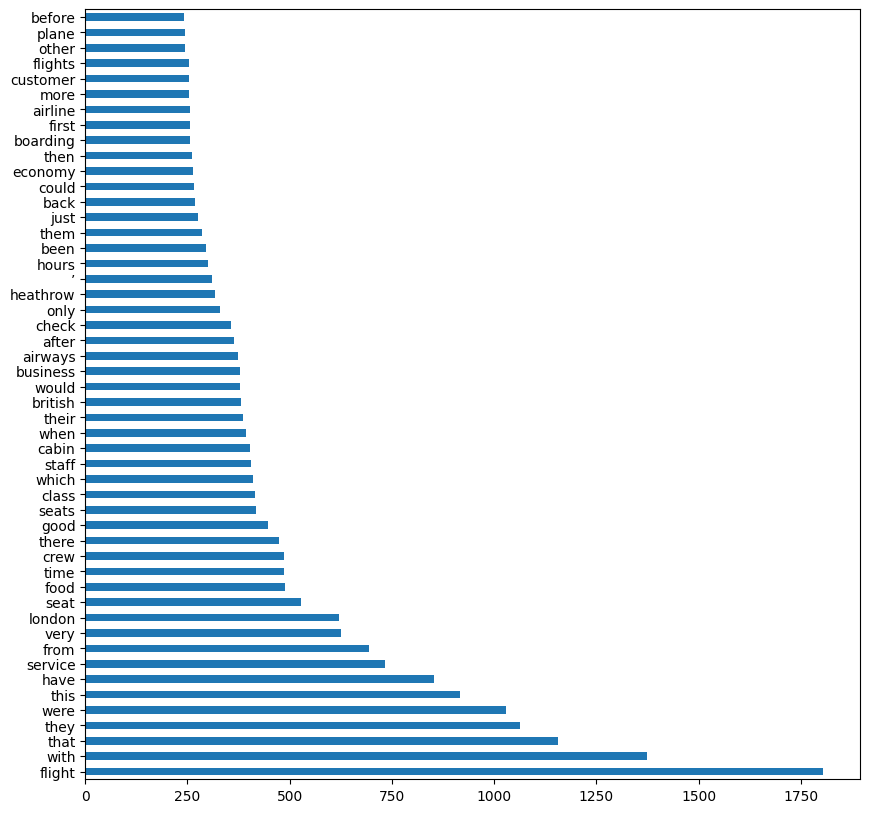

In [81]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0], y=freq_words[1])
plt.show()

Flight is most common, as expected, because it is British airways.

Text Clustering to either positive or negative.

In [82]:
#run reviews through VADER
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [84]:
sid = SentimentIntensityAnalyzer()

In [85]:
reviews['category'] = reviews.apply(lambda reviews: sid.polarity_scores(reviews))

In [87]:
reviews.head()

0         serious medical problem appeared while   ...
1         haven flown British Airways before  will ...
2     Verified    itinerary  supposed    VegasChica...
3        Busy     flight full Lounge crowded   gate...
4       Worst seats  have ever encountered  economy...
Name: reviews, dtype: object

In [89]:
reviews['category']

0      {'neg': 0.235, 'neu': 0.712, 'pos': 0.054, 'co...
1      {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...
2      {'neg': 0.076, 'neu': 0.891, 'pos': 0.033, 'co...
3      {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...
4      {'neg': 0.211, 'neu': 0.75, 'pos': 0.039, 'com...
                             ...                        
995    {'neg': 0.016, 'neu': 0.696, 'pos': 0.288, 'co...
996    {'neg': 0.087, 'neu': 0.701, 'pos': 0.212, 'co...
997    {'neg': 0.148, 'neu': 0.744, 'pos': 0.108, 'co...
998    {'neg': 0.062, 'neu': 0.728, 'pos': 0.21, 'com...
999    {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp...
Name: reviews, Length: 1000, dtype: object

In [93]:
# creating new column for the score if positive or negative
reviews['scores'] = reviews['category'].apply(lambda d:d['compound'])

In [94]:
reviews.head()

0         serious medical problem appeared while   ...
1         haven flown British Airways before  will ...
2     Verified    itinerary  supposed    VegasChica...
3        Busy     flight full Lounge crowded   gate...
4       Worst seats  have ever encountered  economy...
Name: reviews, dtype: object

In [95]:
reviews['scores']

0     -0.8126
1     -0.7968
2     -0.8957
3      0.9556
4     -0.9086
        ...  
995    0.9940
996    0.9001
997   -0.2695
998    0.9084
999    0.9230
Name: reviews, Length: 1000, dtype: float64

In [96]:
#logic from the scores
reviews['comp_score'] = reviews['scores'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [97]:
reviews['comp_score']

0      neg
1      neg
2      neg
3      pos
4      neg
      ... 
995    pos
996    pos
997    neg
998    pos
999    pos
Name: reviews, Length: 1000, dtype: object

In [99]:
df_reviews = pd.DataFrame({'review': reviews, 'scores': reviews['scores'], 'label': reviews['comp_score']})
df_reviews

,review,scores,label
0,serious medical problem appeared while ...,-0.8126,neg
1,haven flown British Airways before will ...,-0.7968,neg
2,Verified itinerary supposed VegasChica...,-0.8957,neg
3,Busy flight full Lounge crowded gate...,0.9556,pos
4,Worst seats have ever encountered economy...,-0.9086,neg
...,...,...,...
998,Gatwick Malaga When booking tickets real...,0.9084,pos
999,Bermuda Gatwick Usual window Aisle seat ...,0.9230,pos
category,"0 {'neg': 0.235, 'neu': 0.712, 'pos': 0.0...",NaN,NaN
comp_score,0 neg 1 neg 2 neg 3 pos 4 ...,NaN,NaN


In [100]:
df_reviews.drop(['category', 'comp_score', 'scores'],axis=0, inplace=True)
df_reviews

,review,scores,label
0,serious medical problem appeared while ...,-0.8126,neg
1,haven flown British Airways before will ...,-0.7968,neg
2,Verified itinerary supposed VegasChica...,-0.8957,neg
3,Busy flight full Lounge crowded gate...,0.9556,pos
4,Worst seats have ever encountered economy...,-0.9086,neg
...,...,...,...
995,Gatwick Faro Club check Gatwick very q...,0.9940,pos
996,Jeddah Chicago London flight from Jedda...,0.9001,pos
997,London Frankfurt need Business frequ...,-0.2695,neg
998,Gatwick Malaga When booking tickets real...,0.9084,pos


Visualize the labels

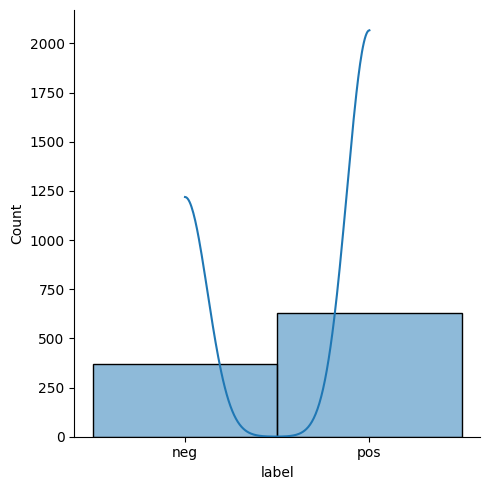

In [102]:
seaborn.displot(df_reviews['label'], kde=True)

In [103]:
positive_review = df_reviews[df_reviews['scores'] >= 0]
negative_review = df_reviews[df_reviews['scores'] < 0]

In [104]:
positive_review

,review,scores,label
3,Busy flight full Lounge crowded gate...,0.9556,pos
5,Verified REASONS British Airways Awa...,0.8966,pos
6,Verified Easy check Heathrow flight ...,0.4939,pos
7,Online check worked fine Quick security c...,0.8479,pos
9,Verified Paid quick visit Nice yesterday f...,0.9638,pos
...,...,...,...
994,Faro Gatwick Club check fairly quick ...,0.9782,pos
995,Gatwick Faro Club check Gatwick very q...,0.9940,pos
996,Jeddah Chicago London flight from Jedda...,0.9001,pos
998,Gatwick Malaga When booking tickets real...,0.9084,pos


In [105]:
negative_review

,review,scores,label
0,serious medical problem appeared while ...,-0.8126,neg
1,haven flown British Airways before will ...,-0.7968,neg
2,Verified itinerary supposed VegasChica...,-0.8957,neg
4,Worst seats have ever encountered economy...,-0.9086,neg
8,first lounge Terminal dirty table...,-0.6743,neg
...,...,...,...
970,booked round trip from Milan California...,-0.7778,neg
977,Amman London Appalling service both fli...,-0.7897,neg
982,service attitude round fiasco when f...,-0.5994,neg
991,London Amsterdam delayed flight mins ...,-0.4939,neg


In [107]:
df_reviews['label'].value_counts()

pos    629
neg    371
Name: label, dtype: int64